# Lead Scoring Case Study 

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

We need to develop a model to select the most promising leads

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Leads.csv")

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
missing_cols = round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)
missing_cols                           

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

## Step 1: Data Preparation

### Delete the columns 
Deleting the columns having more than 40% of missing values.


In [9]:
missing_cols = missing_cols[missing_cols.values>(40)]
missing_cols

Lead Quality                   51.59
Asymmetrique Activity Index    45.65
Asymmetrique Profile Score     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Index     45.65
dtype: float64

In [10]:
null_value_list = list(missing_cols.index.values)

df.drop(labels = null_value_list, inplace = True, axis = 1)


In [11]:
df.shape

(9240, 32)

Since the columns "Prospect Id" and "Lead Number" are id's that doesn't have much use in analysis. So we will be dropping these columns.

In [12]:
df = df.drop(['Prospect ID', 'Lead Number'], axis = 1)


In [13]:
df.shape

(9240, 30)

In [14]:
pd.set_option('display.max_columns',None)
df.head() 

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [15]:
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending = False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Through Recommendations                           0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive Mo

In [16]:
df['Lead Profile'].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

As we can see in the 'Lead Profile' column the values are too high for Select category so we can drop this column.

In [17]:
df.drop(['Lead Profile'], axis = 1, inplace = True)

Since "Country" column doesn't have much to do with our analysis. So we will drop this column.

In [18]:
df.drop(['Country'], axis = 1 , inplace = True)

In [19]:
df['How did you hear about X Education'].value_counts(dropna = False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

As we can see there are more values as 'Select' and 'NaN', since the proportion of unknown value is much more than others. So we will be dropping these.

In [20]:
df.drop(["How did you hear about X Education"], axis = 1, inplace = True)

Drop the column 'City' as well as they are not of much use.

In [21]:
df.drop(['City'], axis = 1, inplace = True)

In [22]:
missing_cols = df.isnull().mean()*100
cols = missing_cols[missing_cols>15].index.tolist()
cols

['Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

In [23]:
for i in cols:
    df[i] = df[i].fillna('Not Known')

In [24]:
df.isnull().sum()

Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

In [25]:
round(100*df.isnull().sum()/df.shape[0],2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article                                0.00
Search                                           0.00
What matters most to you in 

In [26]:
df = df.dropna()

In [27]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

In [28]:
df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

**Note**: By looking at the column"Get updates on DM Content", we get to know that all the customers doesn't want updates on DM content. So we can drop this column as well.

In [29]:
df.drop(['Get updates on DM Content'], axis = 1, inplace = True)

In [30]:
df.shape

(9074, 25)

Let us get the value counts of all the columns and eliminate the columns which is not helping much in our analysis.

In [31]:
for i in df.columns:
    print(f" Value counts for '{i}':")
    print(df[i].astype('category').value_counts())
    print('_________________________________________________________________________________')

 Value counts for 'Lead Origin':
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
_________________________________________________________________________________
 Value counts for 'Lead Source':
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
_________________________________________________________________________________
 Value counts for 'Do Not Email'

As we can see that there are many columns which doesn't have multidimensional values. For Eg: 'Newspaper' is having just two values in Yes and No but the percentsge of having Yes values count is very less. So it is better to drop these columns as they doesn't provide much information.
The columns which needs to be dropped are 'I agree to pay the amount through cheque', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement','Newspaper', 'X Education Forums', 'Newspaper Article', 'Magazine', 'Search', 'What matters most to you in choosing a course', 'Do Not Call'.


In [32]:
del_cols = ['I agree to pay the amount through cheque', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement','Newspaper', 'X Education Forums', 'Newspaper Article', 'Magazine', 'Search', 'What matters most to you in choosing a course', 'Do Not Call']
df.drop(labels = del_cols, axis = 1, inplace = True)


Here 'Tags' column can also be eliminated as this column is not much important for our analysis. 

In [33]:
df.drop('Tags', axis = 1, inplace = True)

In [34]:
df.isna().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [35]:
df.shape

(9074, 12)

In [36]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy Variable Creation


In [37]:
obj_cols = df.loc[ : , df.dtypes == 'object']
obj_cols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
dummy_cols = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)


In [39]:
df= pd.concat([df,dummy_cols], axis = 1)

In [40]:
df.shape

(9074, 93)

In [41]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Conv

In [42]:
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis =1)

In [43]:
df.shape

(9074, 85)

In [44]:

df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Train - Test Split

In [45]:
# Import the libraries for train test split
from sklearn.model_selection import train_test_split

In [46]:
#Puttting all the feature variables in X
X = df.drop(['Converted'], axis = 1)
X.shape

(9074, 84)

In [47]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [48]:
#Puttting all the feature variables in Y
Y = df['Converted']
Y.shape

(9074,)

In [49]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
#Splitting the data into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Few numeric variables in the dataset have different scales. So let us scale these variables. 

In [51]:
#Import MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
### Checking the Converted Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

## Looking at Correlations

In [54]:

df.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Known,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,0.019024,0.013451,-0.124085,-0.000581,-0.008194,-0.011588,0.255480,-0.031812,0.003718,0.013451,0.150027,-0.011237,-0.008194,-0.018326,-0.008194,-0.008194,-0.008194,-0.140786,-0.115775,-0.127327,-0.037746,0.019024,-0.023051,0.019024,-0.032183,0.045672,-0.208619,-0.080999,0.013451,0.335815,-0.011625,-0.023562,-0.011237,-0.008194,0.026549,-0.001661,-0.006241,0.043580,0.029621,0.006161,0.049586,0.001674,-0.007621,0.067607,0.011600,-0.243578,0.044953,-0.008391,0.008560,0.027796,-0.014207,0.020193,-0.008421,0.040372,-0.321473,0.018578,-0.006074,0.126822,0.316246,-0.030860,-0.038445,-0.034043,0.019024,-0.013084,0.013451,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,-0.010562,0.007658,-0.312573,0.193606,-0.000985,0.016943,-0.147576,0.081344,-0.002922,-0.003146,-0.080058,-0.006826,0.001175,0.010361,0.003336,-0.003146,0.001175,0.035715,-0.071171,-0.047215,-0.022517,0.001662,0.020389,0.006246,0.012135,0.018434,-0.140473,0.224679,-0.007468,-0.002852,0.016242,0.004824,0.021410,0.001175,0.041381,0.016653,0.02

# Step 2: Model Building with Logistic Regression

In [55]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [57]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False])

In [58]:
# Let us look at the features selected by RFE
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 43),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 62),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 70),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog', False, 41),
 ('Lead Source_google', False, 36),
 ('Lead Source_testone', False, 38),
 ('Lead Source_welearnblog_Home', False, 50),
 (

In [59]:
#Put all the columns selected by RFE in  col
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Known',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [60]:
#Select only the columns selected by RFE
X_train = X_train[col]

In [61]:
#Assessing the model with statsmodel
import statsmodels.api as sm

In [62]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial()) 
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.8
Date:                Tue, 18 Jun 2024   Deviance:                       5139.7
Time:                        20:32:53   Pearson chi2:                 6.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4077
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2035      0.086    -25.683      0.000      -2.372      -2.035
TotalVisits                                              6.1397      1.981      3.100      0.002       2.258      10.022
Total Time Spent on Website                              4.6346      0.167     27.725      0.000       4.307       4.962
Lead Origin_Lead Add Form                                3.6941      0.224     16.469      0.000       3.255       4.134
Lead Source_Olark Chat                                   1.5363      0.113     13.651      0.000       1.316       1.757
Lead Source_Welingak Website                             2.0019      0.752      2.663      0.008       0.529       3.475
Do Not Email_Yes                                        -1.6785      0.172     -9.774      0.000      -2.015      -1.342
Last Activity_Converted to Lead                         -1.2304      0.226     -5.453      0.000      -1.673      -0.788
Last Activity_Had a Phone Conversation                   1.2745      1.169      1.091      0.275      -1.016       3.565
Last Activity_Olark Chat Conversation                   -1.3412      0.164     -8.156      0.000      -1.663      -1.019
Last Activity_SMS Sent                                   1.2545      0.076     16.566      0.000       1.106       1.403
What is your current occupation_Housewife               22.7211   1.57e+04      0.001      0.999   -3.08e+04    3.09e+04
What is your current occupation_Not Known               -1.2992      0.089    -14.678      0.000      -1.473      -1.126
What is your current occupation_Working Professional     2.4931      0.187     13.319      0.000       2.126       2.860
Last Notable Activity_Had a Phone Conversation           2.2883      1.619      1.414      0.157      -0.884       5.461
Last Notable Activity_Unreachable                        2.0212      0.494      4.092      0.000       1.053       2.989
========================================================================================================================
"""

### Checking VIF's

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,3.41
13,Last Notable Activity_Had a Phone Conversation,3.40
1,Total Time Spent on Website,1.66
3,Lead Source_Olark Chat,1.52
2,Lead Origin_Lead Add Form,1.50
9,Last Activity_SMS Sent,1.47
8,Last Activity_Olark Chat Conversation,1.41
11,What is your current occupation_Not Known,1.41
0,TotalVisits,1.39
4,Lead Source_Welingak Website,1.33


Since all VIFs are less than 5. Then we don't have to drop any column by looking at VIF. if we look at p-value, we can find some columns that needs to be droppedm as the p-values are greater than 0.05.

Let us drop column 'What is your current occupation_Housewife' as it has highest p-value. 

In [65]:
print(X_train.isna().sum())

TotalVisits                                             0
Total Time Spent on Website                             0
Lead Origin_Lead Add Form                               0
Lead Source_Olark Chat                                  0
Lead Source_Welingak Website                            0
Do Not Email_Yes                                        0
Last Activity_Converted to Lead                         0
Last Activity_Had a Phone Conversation                  0
Last Activity_Olark Chat Conversation                   0
Last Activity_SMS Sent                                  0
What is your current occupation_Housewife               0
What is your current occupation_Not Known               0
What is your current occupation_Working Professional    0
Last Notable Activity_Had a Phone Conversation          0
Last Notable Activity_Unreachable                       0
dtype: int64


Let us refit the model with new set of features.

In [66]:
X_train.drop(["What is your current occupation_Housewife"], axis = 1, inplace = True)

Rebuilding the model without "What is your current occupation_Housewife".

In [67]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial()) 
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.1
Date:                Tue, 18 Jun 2024   Deviance:                       5148.3
Time:                        20:32:54   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1955      0.086    -25.636      0.000      -2.363      -2.028
TotalVisits                                              6.0862      1.979      3.075      0.002       2.207       9.965
Total Time Spent on Website                              4.6329      0.167     27.744      0.000       4.306       4.960
Lead Origin_Lead Add Form                                3.7116      0.224     16.573      0.000       3.273       4.151
Lead Source_Olark Chat                                   1.5317      0.112     13.621      0.000       1.311       1.752
Lead Source_Welingak Website                             1.9795      0.752      2.634      0.008       0.506       3.453
Do Not Email_Yes                                        -1.6816      0.172     -9.793      0.000      -2.018      -1.345
Last Activity_Converted to Lead                         -1.2364      0.226     -5.481      0.000      -1.678      -0.794
Last Activity_Had a Phone Conversation                   1.2686      1.169      1.086      0.278      -1.022       3.559
Last Activity_Olark Chat Conversation                   -1.3448      0.164     -8.178      0.000      -1.667      -1.022
Last Activity_SMS Sent                                   1.2489      0.076     16.502      0.000       1.101       1.397
What is your current occupation_Not Known               -1.3020      0.088    -14.716      0.000      -1.475      -1.129
What is your current occupation_Working Professional     2.4883      0.187     13.293      0.000       2.121       2.855
Last Notable Activity_Had a Phone Conversation           2.2884      1.619      1.414      0.157      -0.884       5.461
Last Notable Activity_Unreachable                        2.0163      0.494      4.082      0.000       1.048       2.984
========================================================================================================================
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,3.41
12,Last Notable Activity_Had a Phone Conversation,3.40
1,Total Time Spent on Website,1.65
3,Lead Source_Olark Chat,1.52
2,Lead Origin_Lead Add Form,1.49
9,Last Activity_SMS Sent,1.47
8,Last Activity_Olark Chat Conversation,1.41
10,What is your current occupation_Not Known,1.41
0,TotalVisits,1.39
4,Lead Source_Welingak Website,1.33


Again, after looking at the VIF we find that VIF's are less than 5 but some feature variables are having p - values greater than 0.05. So let us drop the column "Last Activity_Had a Phone Conversation".

In [69]:
X_train.drop(["Last Activity_Had a Phone Conversation"], axis = 1, inplace = True)

Again rebuilding the model without column "Last Activity_Had a Phone Conversation".

In [70]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial()) 
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Tue, 18 Jun 2024   Deviance:                       5149.5
Time:                        20:32:54   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1933      0.086    -25.623      0.000      -2.361      -2.025
TotalVisits                                              6.0998      1.979      3.082      0.002       2.221       9.979
Total Time Spent on Website                              4.6340      0.167     27.757      0.000       4.307       4.961
Lead Origin_Lead Add Form                                3.7101      0.224     16.568      0.000       3.271       4.149
Lead Source_Olark Chat                                   1.5308      0.112     13.614      0.000       1.310       1.751
Lead Source_Welingak Website                             1.9796      0.752      2.634      0.008       0.506       3.453
Do Not Email_Yes                                        -1.6812      0.172     -9.787      0.000      -2.018      -1.344
Last Activity_Converted to Lead                         -1.2387      0.226     -5.492      0.000      -1.681      -0.797
Last Activity_Olark Chat Conversation                   -1.3462      0.164     -8.187      0.000      -1.669      -1.024
Last Activity_SMS Sent                                   1.2467      0.076     16.481      0.000       1.098       1.395
What is your current occupation_Not Known               -1.3035      0.088    -14.735      0.000      -1.477      -1.130
What is your current occupation_Working Professional     2.4865      0.187     13.285      0.000       2.120       2.853
Last Notable Activity_Had a Phone Conversation           3.5547      1.122      3.167      0.002       1.355       5.755
Last Notable Activity_Unreachable                        2.0144      0.494      4.077      0.000       1.046       2.983
========================================================================================================================
"""

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.65
3,Lead Source_Olark Chat,1.52
2,Lead Origin_Lead Add Form,1.49
8,Last Activity_SMS Sent,1.47
7,Last Activity_Olark Chat Conversation,1.41
9,What is your current occupation_Not Known,1.41
0,TotalVisits,1.39
4,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.19
5,Do Not Email_Yes,1.07


**Observation:** So we can see that we have all the p-values<0.05 and VIF's<5. 

# Step 3: Model Evaluation

So we have reached the stage where both the p-values and VIF's are in the required range. Now let us make predictionsusing the final set of features.

In [72]:
# Using 'predict' to predict the probabilities on the train set
Y_train_pred = res.predict(sm.add_constant(X_train))
Y_train_pred[:10]

3009    0.067752
1012    0.280141
9226    0.642045
4750    0.661801
7987    0.922188
1281    0.768365
2880    0.031813
4971    0.916214
7536    0.885538
1248    0.901893
dtype: float64

In [73]:
#Reshaping it into an array

Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.06775246, 0.2801413 , 0.64204507, 0.66180055, 0.92218785,
       0.76836504, 0.03181265, 0.91621424, 0.88553763, 0.90189269])

In [74]:
#Creating a dataframe with the actual conversion flag and the probabilities predicted by the model.
Y_train_pred_final = pd.DataFrame({'Converted': Y_train.values, 'Conversion_Prob':Y_train_pred})
Y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.067752
1,0,0.280141
2,0,0.642045
3,1,0.661801
4,1,0.922188


**Creating new column 'Predicted' with 1 if Paid_prob >0.5 else 0**

In [75]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.5 else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.067752,0
1,0,0.280141,0
2,0,0.642045,1
3,1,0.661801,1
4,1,0.922188,1


Now that we have got the probabilities and also got conversion predictions. Let us evaluate the model. 

In [76]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)*100)

81.27853881278538


In [78]:
# Let us create confusion matrix 

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
confusion

array([[3458,  447],
       [ 742, 1704]], dtype=int64)

## Metrics beyond simply accuracy

In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# let us calculate the sensitivity
TP/float(TP+FN)

0.6966475878986099

In [81]:
# let us calculate the specificity
TN/float(TN+FP)

0.8855313700384123

In [82]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11446862996158771


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.7921896792189679


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8233333333333334


## Plotting the ROC Curve

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob, drop_intermediate = False)

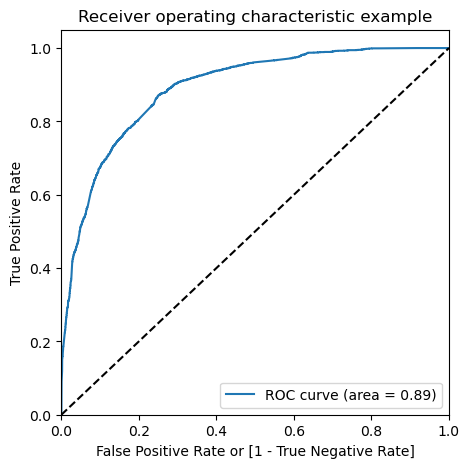

In [87]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

As we can see the area under the curve is 0.89, which is quite good. This seems to be a good model. Let's also find out the optimal cutoff point. 

In [88]:
# Let's create columns with different probability cutoffs

numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i] = Y_train_pred_final.Conversion_Prob.map(
        lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067752,0,1,0,0,0,0,0,0,0,0,0
1,0,0.280141,0,1,1,1,0,0,0,0,0,0,0
2,0,0.642045,1,1,1,1,1,1,1,1,0,0,0
3,1,0.661801,1,1,1,1,1,1,1,1,0,0,0
4,1,0.922188,1,1,1,1,1,1,1,1,1,1,1


In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted,
                                   Y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1

    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.604629  0.986509  0.365429
0.2   0.2  0.763187  0.918234  0.666069
0.3   0.3  0.792159  0.877351  0.738796
0.4   0.4  0.810581  0.768193  0.837132
0.5   0.5  0.812785  0.696648  0.885531
0.6   0.6  0.808692  0.638594  0.915237
0.7   0.7  0.783341  0.522486  0.946735
0.8   0.8  0.763029  0.434996  0.968502
0.9   0.9  0.712014  0.274325  0.986172


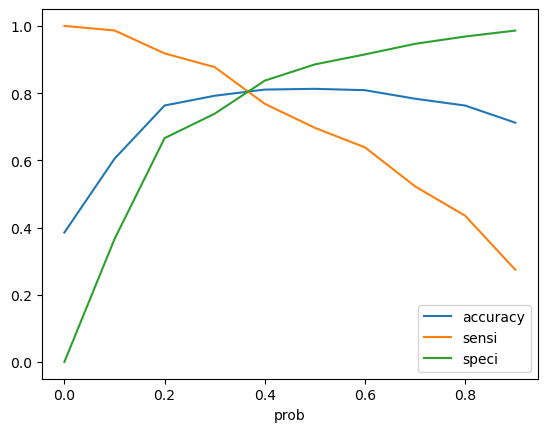

In [91]:
#Let us plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x ='prob', y =['accuracy','sensi','speci'])
plt.show()

By looking at the curve it can be observed that at around 0.38 , we get the optimal values of three metrics. So, 0.38 is the optimum point to take it as a cutoff probability. 

In [92]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.38 else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.067752,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.280141,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.642045,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.661801,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.922188,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
#Let us check the accuracy
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8090064556762715

In [94]:
#Creating Confusion matrix once again

confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)
confusion2

array([[3225,  680],
       [ 533, 1913]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
# Sensitivity
TP/float(TP+FN)

0.7820932134096484

In [97]:
# Specificity
TN/ float(TN+FP)

0.8258642765685019

In [98]:
# Calculate the false positive rate
print(FP/float(TN+FP))

0.17413572343149808


In [99]:
#Positive Prdictive value
print(TP/float(TP+FP))

0.7377554955649827


In [100]:
#Negative predictive value
print(TN/float(TN+FN))

0.858169238956892


# Step 4: Precision and Recall

In [101]:
#Looking at the confusion matrix once again
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted)
confusion

array([[3458,  447],
       [ 742, 1704]], dtype=int64)

### Precision = TP/TP+FP

In [102]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.7921896792189679

### Recall = TP/TP+FN 

In [103]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.6966475878986099

### Precision and Recall Tradeoff

In [104]:
# Import the libraries
from  sklearn.metrics import precision_recall_curve

In [105]:
Y_train_pred_final.Converted, Y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [106]:
p, r, threshold = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

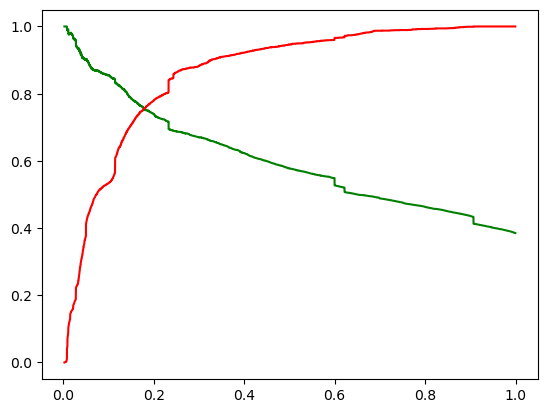

In [107]:
plt.plot(thresholds, p[:], "g-")
plt.plot(thresholds, r[:], "r-")
plt.show()

In [108]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.18 else 0)

Y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.067752,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.280141,0,1,1,1,0,0,0,0,0,0,0,1
2,0,0.642045,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.661801,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.922188,1,1,1,1,1,1,1,1,1,1,1,1


In [109]:
# Let's check the accuracy now

metrics.accuracy_score(Y_train_pred_final.Converted,
                       Y_train_pred_final.final_predicted)

0.7479137143756889

In [110]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted,
                                      Y_train_pred_final.final_predicted)
confusion2

array([[2484, 1421],
       [ 180, 2266]], dtype=int64)

In [111]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Calculate Precision

TP/(TP+FP)  

0.6145918090588555

In [113]:
# Calculate Recall

TP/(TP+FN)

0.9264104660670482

# Step 5: Making predictions on the Test set

In [114]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])


In [115]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,0.015936,0.070530,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.019920,0.679695,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,0.007968,0.033243,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,0.031873,0.073675,0,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])

In [117]:
#Check X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Not Known,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3271,1.0,0.015936,0.070530,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.019920,0.679695,0,0,0,0,0,0,0,0,0,0,1,0,0
7936,1.0,0.007968,0.033243,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3830,1.0,0.031873,0.073675,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,0,0,0,0,1,0,0,0,0,1,0,0,0
2879,1.0,0.007968,0.264600,0,0,0,0,1,0,0,0,0,0,0,0,0
6501,1.0,0.031873,0.599730,0,0,0,0,0,0,0,1,0,0,0,0,0
7155,1.0,0.011952,0.231357,0,0,0,0,0,0,0,0,0,1,0,0,0


In [118]:
X_test.drop(['Last Activity_Had a Phone Conversation', 'What is your current occupation_Housewife'], axis = 1, inplace = True)

In [119]:
#let  us now make prediction on the test set 
Y_test_pred = res.predict(sm.add_constant(X_test))

In [120]:
Y_test_pred[:10]

3271    0.044245
1490    0.972467
7936    0.035773
4216    0.820071
3830    0.049220
1800    0.645034
6507    0.353180
4821    0.326315
4223    0.940674
4714    0.327549
dtype: float64

In [121]:
#Converting Y_pred to a dataframe
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [122]:
Y_pred_1.head()

,0
3271,0.044245
1490,0.972467
7936,0.035773
4216,0.820071
3830,0.049220


In [123]:
# Converting Y_test to a DataFrane

Y_test_df = pd.DataFrame(Y_test)

In [124]:
#Let us remove index from both the DataFrame to appennd it side by side

Y_pred_1.reset_index(drop = True, inplace = True)
Y_test_df.reset_index(drop=True, inplace = True)

In [125]:
# Append Y_test_df and Y_pred_1

Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [126]:
# Check 'Y_pred_final'

Y_pred_final.head()

,Converted,0
0,0,0.044245
1,1,0.972467
2,0,0.035773
3,1,0.820071
4,0,0.049220


In [127]:
# Rename the column 

Y_pred_final= Y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [128]:
# Let's see the head of y_pred_final

Y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.044245
1,1,0.972467
2,0,0.035773
3,1,0.820071
4,0,0.049220


In [129]:
# Make predictions on the test set using 0.18 as the cutoff

Y_pred_final['final_predicted'] = Y_pred_final.Conversion_Prob.map(
    lambda x: 1 if x > 0.38 else 0)

In [130]:
# Check y_pred_final

Y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.044245,0
1,1,0.972467,1
2,0,0.035773,0
3,1,0.820071,1
4,0,0.049220,0


In [131]:
# Let's check the overall accuracy

metrics.accuracy_score(Y_pred_final['Converted'], Y_pred_final.final_predicted)

0.8112376055820786

In [132]:
confusion3 = metrics.confusion_matrix(Y_pred_final['Converted'],
                                      Y_pred_final.final_predicted)
confusion3

array([[1443,  291],
       [ 223,  766]], dtype=int64)

In [133]:
TP = confusion3[1, 1]  # true positive
TN = confusion3[0, 0]  # true negatives
FP = confusion3[0, 1]  # false positives
FN = confusion3[1, 0]  # false negatives

In [134]:
# Calculate sensitivity
TP / float(TP+FN)

0.7745197168857432

In [135]:
# Calculate specificity
TN / float(TN+FP)

0.8321799307958477